In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [7]:
df =pd.read_csv('Mall_Customers.csv')
print(df.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [8]:
X=df[["Age","Annual Income (k$)","Spending Score (1-100)"]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
wcss=[]
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,random_state=42,n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

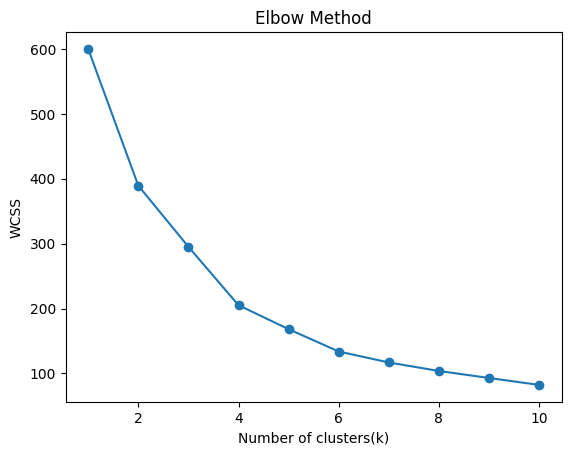

In [9]:
plt.plot(range(1,11),wcss,marker='o')
plt.xlabel("Number of clusters(k)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

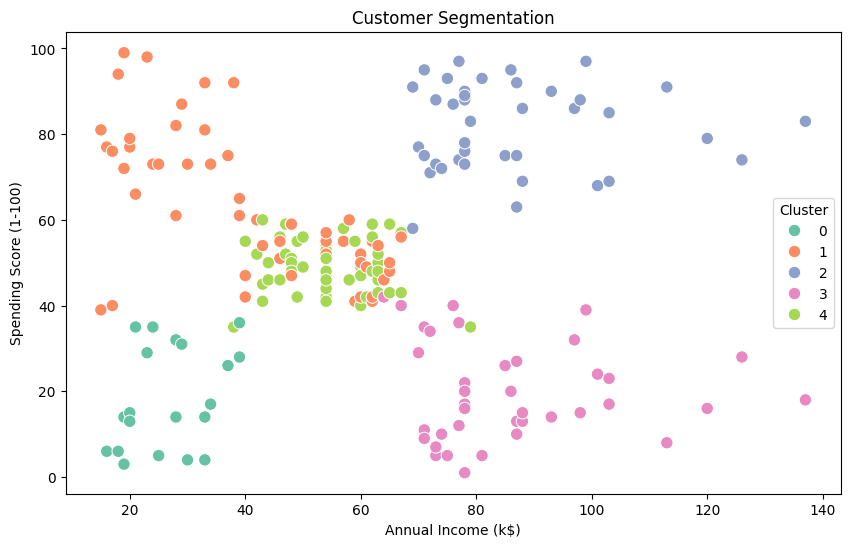

In [10]:
kmeans= KMeans(n_clusters=5,random_state=42,n_init=10)
df["Cluster"]=kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Cluster", palette="Set2", s=80)
plt.title("Customer Segmentation")
plt.show()